In [2]:
import os
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load logs from JSON into list of dictionaries
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print files

['.DS_Store', '.gitignore', '0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', 'mouse_movement.ipynb']


In [3]:
tests = []

for f in files:
    if f not in ['.DS_Store', '.gitignore','mouse_movement.ipynb']:
        with open(f, 'r') as f:
            data = json.load(f)
            tests.append(data)

In [16]:
# Sample from user 12
images = tests[12]['experiment']

# Empty array for all mouse movements
all_coords = []

# Save mouse movements into 2 x len(mouse) array
for img in images:
    # Ignore prompts
    if img['dataType'] == 'trial':
        mouse_mvmt = img['mouse']
    
        # Empty array
        coords = np.zeros((2, len(mouse_mvmt)))
        for i, t in enumerate(mouse_mvmt):
            # Load coordinates into array 
            # Becuase web axis are left-down, we invert the y
            coords[0,i] = t['x']
            coords[1,i] = -t['y']
        
        # Subtract start to center at 0,0
        x_start, y_start = coords[0,0], coords[1,0]
        coords -= np.array([[x_start],[y_start]])
        
        all_coords.append(coords)

In [22]:
rot_coords = []

# Rotate each coordinate
for coords in all_coords:
    # Get start and end for angle
    x_start, y_start = coords[0,0], coords[1,0]
    x_end, y_end = coords[0,-1], coords[1,-1]
    
    # Some trig ... SOHCAHTOA! SOHCAHTOA! SOHCAHTOA!
    r = -math.atan2((y_end-y_start),(x_end-x_start))
    R = np.array([[math.cos(r), -math.sin(r)],[math.sin(r), math.cos(r)]])
    
    rot_coords.append(np.matmul(R, coords))

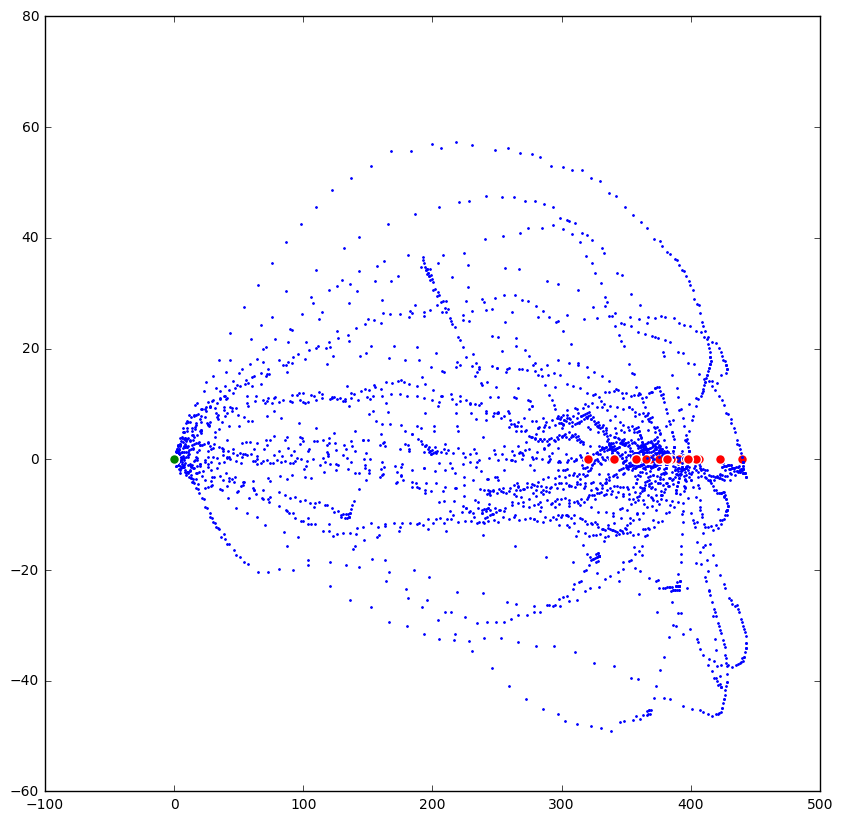

In [24]:
plt.figure(figsize=(10,10))

for coords in rot_coords:
    plt.scatter(coords[0,:], coords[1,:], s = 3 , lw = 0)
    plt.scatter(coords[0,0], coords[1,0], c='green', s=50, lw = 1, edgecolors='white', label='START')
    plt.scatter(coords[0,-1], coords[1,-1], c='red', s=50, lw = 1, edgecolors='white', label='END')
    
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

# plt.legend()


plt.show()

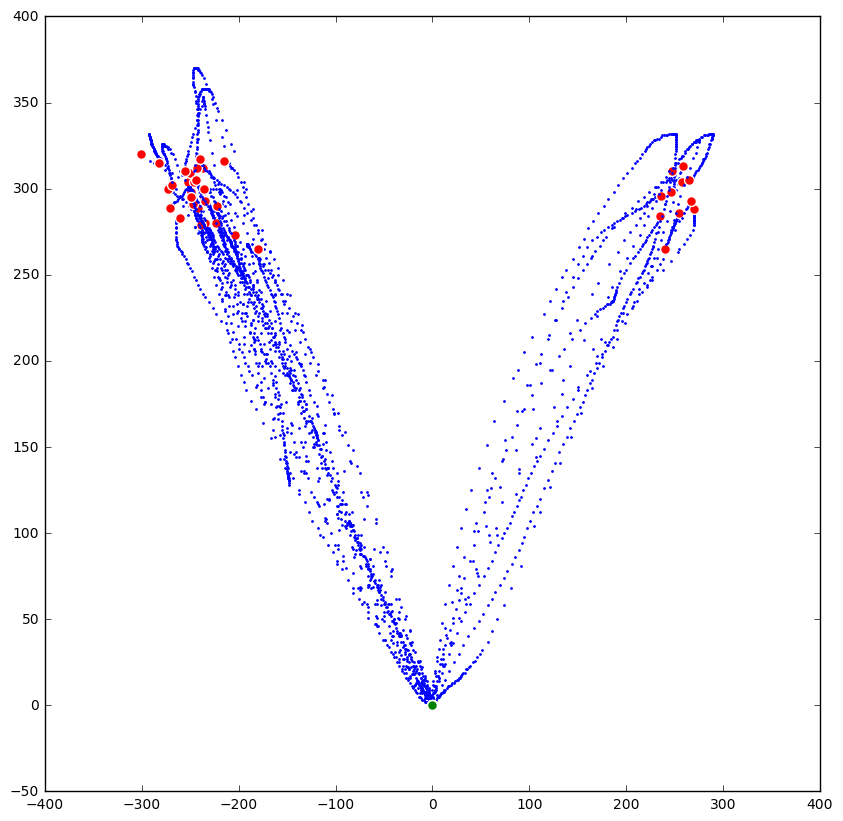

In [21]:
plt.figure(figsize=(10,10))

for coords in all_coords:
    plt.scatter(coords[0,:], coords[1,:], s = 3 , lw = 0)
    plt.scatter(coords[0,0], coords[1,0], c='green', s=50, lw = 1, edgecolors='white', label='START')
    plt.scatter(coords[0,-1], coords[1,-1], c='red', s=50, lw = 1, edgecolors='white', label='END')
    
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()

# plt.legend()


plt.show()